In [25]:
from staNMF import staNMF
from staNMF.nmf_models import spams_nmf, sklearn_nmf
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from staNMF.main import amariMaxError, findcorrelation

In [8]:
# load data
n_features = 10
n_samples = 200
n_components = 5
V = (
    np.random.uniform(0, 1, (n_components, n_features))
    * np.random.choice([0, 1], (n_components, n_features))
)
U = (
    np.random.uniform(0, 1, (n_samples, n_components))
    * np.random.choice([0, 1], (n_samples, n_components), p=[0.8,0.2])
)
X = U @ V + np.random.normal(0,1,(n_samples, n_features)) * 0.01

In [53]:
# define_model
model = staNMF(X,folderID="toy_example", K1=3, K2=7, parallel=True, replicates=20, seed=123)

In [54]:
# run NMF for different Ks
model.runNMF(spams_nmf(arguments={'iter':500, 'batchsize':100}, bootstrap=True))

Working on K = 3...
Working on K = 4...
Working on K = 5...
Working on K = 6...
Working on K = 7...


In [55]:
# compute the instability
model.instability("spams_nmf")

Calculating instability for 3
Calculating instability for 4
Calculating instability for 5
Calculating instability for 6
Calculating instability for 7


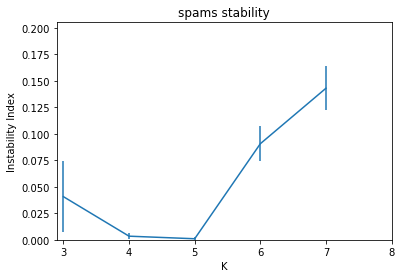

In [56]:
# visualize the instability result
model.plot(dataset_title="spams stability")

In [57]:
model.get_instability()

{3: 0.04074545965605644,
 4: 0.0034208108870484263,
 5: 0.000986213624189954,
 6: 0.09072333887873302,
 7: 0.14311959969836896}

- Observation: the staNMF chooses the right number of components.

In [61]:
model = load("./staNMFDicts_toy_example/K=5/nmf_model_spams_nmf_4.joblib")

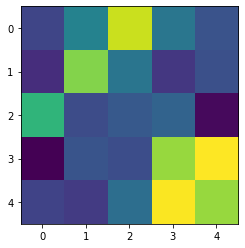

In [62]:
plt.imshow(model.components_ @ V.T)

## Try sklearn nmf

In [20]:
# define_model
model = staNMF(np.maximum(X,0),
               folderID="toy_example",
               K1=3, K2=7,
               parallel=True,
               replicates=50,
               seed=123)

In [21]:
# run NMF for different Ks
model.runNMF(sklearn_nmf(bootstrap=True))

Working on K = 3...
Working on K = 4...
Working on K = 5...
Working on K = 6...
Working on K = 7...


In [22]:
# compute the instability
model.instability("sklearn_nmf")

Calculating instability for 3
Calculating instability for 4
Calculating instability for 5
Calculating instability for 6
Calculating instability for 7


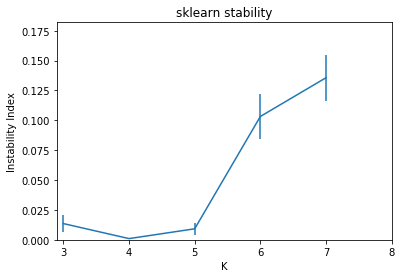

In [23]:
# visualize the instability result
model.plot(dataset_title="sklearn stability")

In [24]:
model.get_instability()

{3: 0.013570623358846096,
 4: 0.0010076606818578242,
 5: 0.009205875703847325,
 6: 0.10322356189106298,
 7: 0.13565357082783605}

- Observation: the stability for patterns 3-5 is very good. For more patterns, it is less good.

In [18]:
model1 = load("./staNMFDicts_toy_example/K=5/nmf_model_sklearn_nmf_4.joblib")
model2 = load("./staNMFDicts_toy_example/K=5/nmf_model_sklearn_nmf_2.joblib")

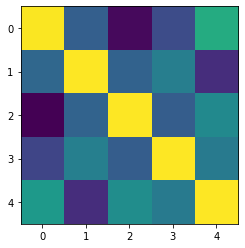

In [26]:
plt.imshow(findcorrelation(model1.components_.T, model2.components_.T))